В задачах используйте реализацию K-means из библиотеки sklearn:

from sklearn.cluster import KMeans
При обучении используйте параметры, указанные в вашем варианте, например

KMeans(n_clusters=3, init=centroid, max_iter=100, n_init=1)

Вам доступна таблица некоторых синтетических данных, на основании которых необходимо выполнить кластеризацию на K = 3 кластера методом К-средних.

Ниже данные таблицы представлены в формате строк, на случай если таблица не копируется (можно сразу сохранить как CSV файл, используя любой текстовый редактор):

Object,X,Y,Cluster
1, 18, 11, 0
2, 13, 16, 1
3, 16, 12, 2
4, 19, 5, 0
5, 20, 19, 0
6, 17, 1, 2
7, 3, 1, 0
8, 15, 18, 1
9, 6, 4, 1
10, 11, 4, 0
11, 5, 16, 1
12, 19, 11, 0
13, 5, 12, 1
14, 10, 11, 1
15, 9, 2, 2

В sklearn используйте начальную инициализацию со следующими координатами центроидов и параметрами:
KMeans(n_clusters=3, init=np.array([[15.0, 8.5], [9.0, 12.83], [14.0, 5.0]]), max_iter=100, n_init=1)

Укажите, к какому кластеру будет отнесен тот или иной объект в результате кластеризации (задание засчитывается только в том случае, если все кластеры указаны верно).

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.cluster import KMeans

df = pd.read_csv("data.csv", sep=",", decimal='.', index_col='Object')
df.head()

,X,Y,Cluster
Object,,,
1,18,11,0
2,13,16,1
3,16,12,2
4,19,5,0
5,20,19,0


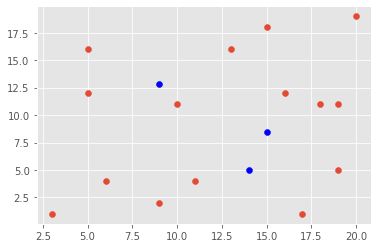

In [2]:
plt.scatter(data = df, x = "X", y = "Y")
plt.scatter(15.0, 8.5, color='b')
plt.scatter(9.0, 12.83, color='b')
plt.scatter(14.0, 5.0, color='b')

plt.show()

In [3]:
df_no_cluster = df.drop(columns='Cluster')

model = KMeans(n_clusters=3, init=np.array([[15.0, 8.5], [9.0, 12.83], [14.0, 5.0]]), max_iter=100, n_init=1)
model.fit(df_no_cluster)

df_no_cluster['cluster'] = model.labels_
df_no_cluster

,X,Y,cluster
Object,,,
1,18,11,0
2,13,16,1
3,16,12,0
4,19,5,0
5,20,19,0
6,17,1,2
7,3,1,2
8,15,18,0
9,6,4,2


[[17.83333333 12.66666667]
 [ 8.25       13.75      ]
 [ 9.2         2.4       ]]


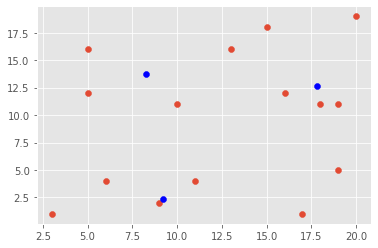

In [4]:
print(model.cluster_centers_)

cluster_centers = model.cluster_centers_

plt.scatter(data = df_no_cluster, x = "X", y = "Y")
plt.scatter(cluster_centers[0][0], cluster_centers[0][1], color='b')
plt.scatter(cluster_centers[1][0], cluster_centers[1][1], color='b')
plt.scatter(cluster_centers[2][0], cluster_centers[2][1], color='b')

plt.show()

In [5]:
df_cluster_0 = df_no_cluster[df_no_cluster['cluster'] == 0]
df_cluster_0 = df_cluster_0.drop(columns='cluster')

x_array = df_cluster_0['X'].tolist()
y_array = df_cluster_0['Y'].tolist()
point_0_x = 17.83333333
point_0_y = 12.66666667

count = 0
sum = 0
for i in range(len(x_array)):
  sum = sum + np.sqrt((x_array[i] - point_0_x)**2 + (y_array[i] - point_0_y)**2)
  count += 1

print(round(sum/count, 3))

4.358
